# Basic Neural Network

A simple feedforward neural network to classify spin configurations. Based off of course material from CSCI 1051 by Teal Witter.

In [17]:
# We start by importing the libraries we'll use today
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

Load the data generated by the ON_Model

In [19]:
# data transforms
dset_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()])


# Use the image folder function to create datasets
dsets = {x: datasets.ImageFolder(f"../data/{x}", dset_transform)
         for x in ['train', 'test']}

# dataloaders = {x: torch.utils.data.DataLoader(dsets[x], batch_size=16,
#                                               shuffle=(x == "train"))
#                for x in ['train', 'test']}

trainingdata = dsets['train']
testdata = dsets['test']

trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

In [20]:
print(len(trainingdata))

930


torch.Size([1, 25, 25])
0
[[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
   1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
   1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.


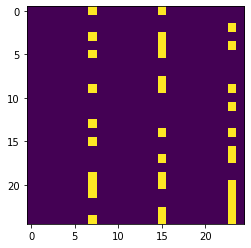

In [21]:
image, label = trainingdata[355]
print(image.shape)
print(label)
print(image.numpy())
plt.imshow(image.squeeze().numpy())
plt.show()

This is a basic feedforward neural net architecture

In [22]:
class NeuralNet(torch.nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.layers = torch.nn.Sequential(
      torch.nn.Linear(25*25, 256),
      torch.nn.ReLU(),
      torch.nn.Linear(256, 128),
      torch.nn.ReLU(),
      torch.nn.Linear(128, 64),
      torch.nn.ReLU(),
      torch.nn.Linear(64, 2)
    )
  
  def forward(self, x):
    x = x.view(-1, 25*25) # change so 784 vector instead of 28x28 matrix
    return self.layers(x)



In [23]:
# define loss function, optimizer
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
save_loss = {'train':[], 'test':[]}
save_acc = {'train':[], 'test':[]}

Now let's train our model!

In [24]:
train_loss_history = []
test_loss_history = []

for epoch in range(50):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    optimizer.zero_grad()
    predicted_output = model(images)
    fit = criterion(predicted_output, labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item() / len(trainingdata)
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      predicted_output = model(images)
      fit = criterion(predicted_output, labels)
      test_loss += fit.item() / len(testdata)
  train_loss_history += [train_loss]
  test_loss_history += [test_loss]
  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')
    

Epoch 0, Train loss 0.011151772545230004, Test loss 0.011027510269828464
Epoch 1, Train loss 0.011120905927432482, Test loss 0.011008477383765619
Epoch 2, Train loss 0.011085588252672585, Test loss 0.010992454791414565
Epoch 3, Train loss 0.011061216874789169, Test loss 0.010979589344798655
Epoch 4, Train loss 0.011028910644592778, Test loss 0.01097020100856173
Epoch 5, Train loss 0.011012683696644281, Test loss 0.010962694624195928
Epoch 6, Train loss 0.010999458259151827, Test loss 0.010956865808238153
Epoch 7, Train loss 0.010971229948023315, Test loss 0.010951954644659291
Epoch 8, Train loss 0.01097774685070079, Test loss 0.010948065743930098
Epoch 9, Train loss 0.010948237808801796, Test loss 0.010943891950275588
Epoch 10, Train loss 0.010931404047114877, Test loss 0.010940508911575096
Epoch 11, Train loss 0.010919984309904037, Test loss 0.010937992040661799
Epoch 12, Train loss 0.010927379003135108, Test loss 0.010935765936754752
Epoch 13, Train loss 0.010908988983400406, Test lo

Let's plot our loss by epoch to see how we did.

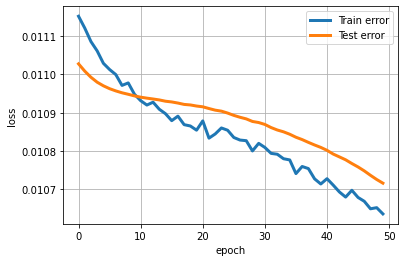

In [25]:
plt.plot(range(50),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(50),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipykernel_1553969/469716450.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_output = torch.nn.functional.softmax(predicted_output).detach().numpy()


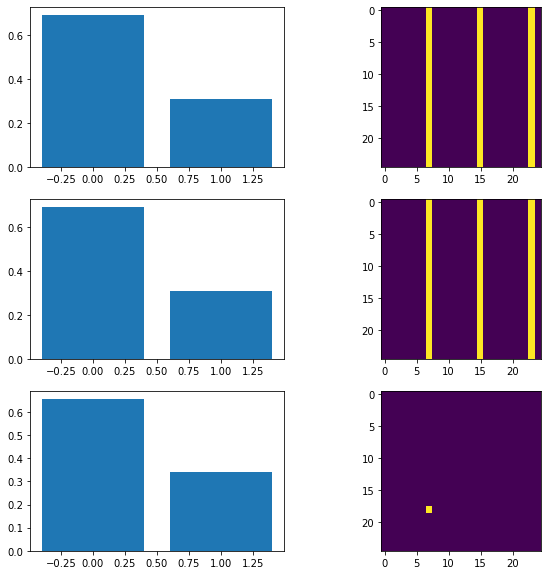

In [16]:
plt.figure(figsize=(10,10))
for index in [0,1,2]:
  
  image = images[index]
  predicted_output = model(images)[index]
  # Need to apply softmax to get probabilities
  prob_output = torch.nn.functional.softmax(predicted_output).detach().numpy()

  plt.subplot(3,2,2*index+1)
  plt.bar(list(range(len(prob_output))), prob_output)
 
  plt.subplot(3,2,2*index+2)
  plt.imshow(image.squeeze().numpy())
  
plt.show()